Iteration    0: Cost 2657132.91   
Iteration  400: Cost 568462.24   
Iteration  800: Cost 278657.24   
Iteration 1200: Cost 172418.65   
Iteration 1600: Cost 129598.18   
Iteration 2000: Cost 111497.87   
Iteration 2400: Cost 103525.68   
Iteration 2800: Cost 99860.88   
Iteration 3200: Cost 98095.10   
Iteration 3600: Cost 97199.24   
b,w found by gradient descent: 0.44,[ 12.34156743   6.15838682  12.30164899  18.27346595  -1.8472068
  47.00770867  11.94398981  -9.51393575  15.32132751   7.15299488
  -0.21336596  -0.50613328  23.78196449  58.5085335    1.92201091
  26.1935845    0.4019634   13.53695702  29.94567061  43.56905647
   1.87895373  -0.33913006 -24.84005952  12.06976905   0.13205551] 


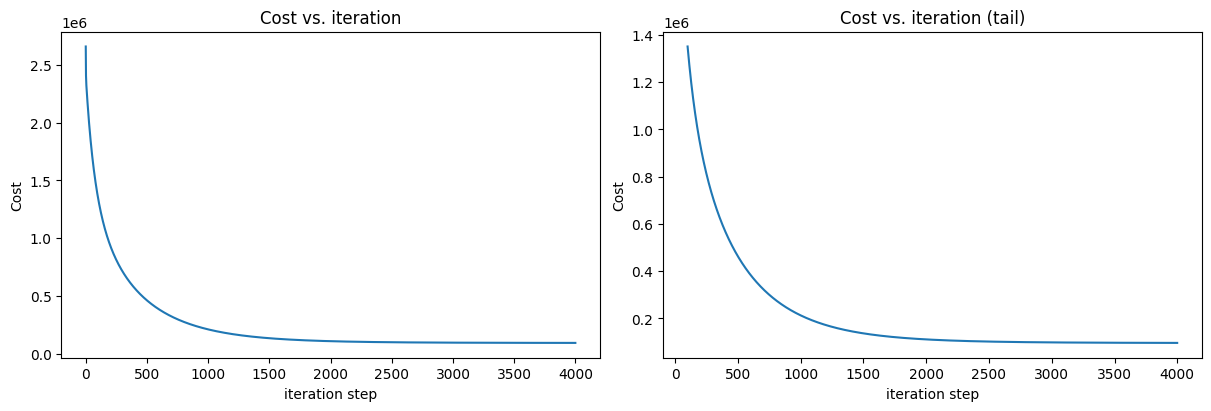

In [ ]:
import os
import pandas as pd

import copy, math
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('1.xlsx')


X_train = df.iloc[1:-1,1:26]
y_train = df.iloc[1:-1,26]

def compute_cost(X, y, w, b):

    m = X.shape[0]
       #scalar
    cost = np.array((np.dot(X, w) + b - y)**2) / (2 * m)                      #scalar
    return cost.sum()

def compute_gradient(X, y, w, b):

    m,n = X.shape           #(number of examples, number of features)

        # Predictions
    f_wb = np.dot(X, w) + b

    # Calculate the error
    error = f_wb - y

    # Calculate the gradients
    dj_dw = (np.dot(X.T, error)) / m
    dj_db = (np.sum(error)) / m

    return dj_db, dj_dw



def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

# initialize parameters
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.
# some gradient descent settings
iterations = 4000
alpha = 5.0e-6
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape


# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

In [ ]:
# b,w found by gradient descent: 0.44,[ 12.76299811   7.31563422  12.57623079  18.16227396  -1.6803514
#   47.27228584  11.91888296 -10.21583568  15.1274393    7.10057239
#   -0.18136111  -0.43554283  23.28848398  57.96182348   1.65598312
#   26.13286077   0.43929406  13.73974011  29.92631213  43.6479484
#    1.50194153   0.50423806 -24.00833799  12.1403331    0.15357049]

X_CV = df.iloc[3000:3999,1:26]
y_CV = df.iloc[3000:3999,26]

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_CV.shape

def compute_pred(x,w,b):
    m = x.shape[0]
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = np.dot(x.iloc[i], w) + b
    return y_pred

y_pred = compute_pred(X_CV,w_final,b_final)
m,_ = X_CV.shape
for i in range(m):
    print(f"prediction: {np.dot(X_CV.iloc[i], w_final) + b_final:0.2f}, target value: {y_CV.iloc[i]}")






b,w found by gradient descent: 0.44,[ 12.34156743   6.15838682  12.30164899  18.27346595  -1.8472068
  47.00770867  11.94398981  -9.51393575  15.32132751   7.15299488
  -0.21336596  -0.50613328  23.78196449  58.5085335    1.92201091
  26.1935845    0.4019634   13.53695702  29.94567061  43.56905647
   1.87895373  -0.33913006 -24.84005952  12.06976905   0.13205551] 
prediction: 554.00, target value: 482.441407372522
prediction: 1608.64, target value: 1995.72254921661
prediction: -904.06, target value: -69.3033037252985
prediction: 5862.85, target value: 6076.51268809377
prediction: 2902.90, target value: 2909.12458887167
prediction: 3444.09, target value: 3621.68670833241
prediction: -31.86, target value: -533.300491191006
prediction: 1037.68, target value: 1265.13928913112
prediction: 4657.48, target value: 5098.17465255342
prediction: -1697.29, target value: -928.51403374637
prediction: 1964.67, target value: 2250.32216895711
prediction: 1996.06, target value: 1454.05247713195
predicti

In [ ]:
def compute_cost(X, y, w, b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X.iloc[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y.iloc[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar
    return cost

J_train= compute_cost(X_train,y_train,w_final,b_final)
J_CV = compute_cost(X_CV,y_CV,w_final,b_final)

print(f"cost train: {J_train:0.2f} cost CV: {J_CV:0.2f} ")


cost train: 96719.92 cost CV: 96669.25 


In [ ]:
# computing R squared function

X_CV = df.iloc[3000:3999,1:26]
y_CV = df.iloc[3000:3999,26]

def r_squared(y, y_hat):
    """
    Calculates the R-squared (coefficient of determination) score.

    Args:
        y (ndarray): The actual target values.
        y_hat (ndarray): The predicted target values.

    Returns:
        float: The R-squared score.
    """
    y_bar = y.mean()  # Calculate the mean of the actual values
    ss_tot = ((y - y_bar)**2).sum()  # Total sum of squares
    ss_res = ((y_bar - y_hat)**2).sum()  # Residual sum of squares
    return  (ss_res / ss_tot)

def compute_pred(x,w,b):
    m = x.shape[0]
    y_pred = np.zeros(m)
    for i in range(m):
        y_pred[i] = np.dot(x.iloc[i], w) + b
    return y_pred


# Assuming you have X_CV, y_CV, w_final, b_final from your previous code
b_final = 0.44
w_final= [ 12.76299811  , 7.31563422 , 12.57623079 , 18.16227396 , -1.6803514,
          47.27228584 , 11.91888296 ,-10.21583568 , 15.1274393  ,  7.10057239,
  -0.18136111 , -0.43554283 , 23.28848398,  57.96182348  , 1.65598312,
  26.13286077 ,  0.43929406 , 13.73974011 , 29.92631213 , 43.6479484,
   1.50194153 ,  0.50423806 ,-24.00833799 , 12.1403331   , 0.15357049]
y_pred = compute_pred(X_CV, w_final, b_final)
r2 = r_squared(y_CV, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.9524113381206407


In [ ]:
# test set prediction
df1 = pd.read_csv('linear_regression_test-1.csv')

X_test = df1.iloc[4000:,1:26]

y_pred = compute_pred(X_test, w_final, b_final)
print(y_pred)

[ -92.18450765 2642.08594313 2547.61231067 ... 5275.87687467 -111.1936223
  453.74632428]
